Fagan's nomogram simplifies tests' (or signs/symptoms) Likelihood Ratios interpretation, given the prior disease probability and offers a simple graphical method to get the resulting posterior disease probability with no computation ([Franco and Di Napoli, 2016](https://scholar.google.com/scholar_url?url=https://journals.aboutscience.eu/index.php/gcnd/article/download/769/682&hl=it&sa=T&oi=gsb-gga&ct=res&cd=0&d=6813843125631745753&ei=48HOXtH0Eo2emQHK84qgCA&scisig=AAGBfm0WQrI7IK73SVm4sy6aa2SV389Uyw), [Caraguel and Vanderstichel, 2013](https://scholar.google.com/scholar_url?url=https://pdfs.semanticscholar.org/14a2/9ceb40cb45305fcca31c0124d67e7b0f5bd9.pdf&hl=it&sa=T&oi=gsb-gga&ct=res&cd=0&d=8551469495142906828&ei=F8LOXt-4Hc-_mAHJubjQBQ&scisig=AAGBfm0i7bSlXZomk-uGWq7wKhKAzHZE-A)).

Let's code a Fagan's nomogram, step by step with `matplotlib` in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, Markdown

We know that posterior Odd $\mathbf{O_{po}}$ given a test result $\odot$ (or a found sign or symptom) are the test's (or sign/symptom) Likelihood Ratio $\mathbf{LR}$ times the disease prior Odd $\mathbf{O_{pr}}$

$$
\mathbf{O_{po}} = \mathbf{LR} \cdot \mathbf{O_{pr}}
$$

Equality relating Odds and Probabilities are $\mathbf{O} = P / (1 - P)$, thus we can that

$$
\frac{\mathbf{Po}}{1 - \mathbf{Po}} = \mathbf{LR} \cdot \frac{\mathbf{Pr}}{1 - \mathbf{Pr}}
$$

where $\mathbf{Po}$ is the disease posterior probability given the test result $\mathbf{Po} = P(M|\odot)$ and $\mathbf{Pr}$ is the prior disease probability $\mathbf{Pr} = P(M)$.

The three terms of this equation represent the base of Fagan nomogram's three axes, relating disease prior and posterior probabilities and likelihood ratios. In detail, if we want to place prior probabilities axis to the left, posterior probabilities axis to the right and likelihood ratios in the middle, we can rewrite

$$
\frac{\mathbf{Pr}}{1 - \mathbf{Pr}} = \frac{1}{\mathbf{LR}} \cdot \frac{\mathbf{Po}}{1 - \mathbf{Po}}
$$

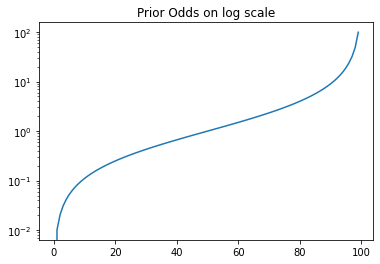

In [2]:
Pr = np.linspace(0, 1, 101)
Opr = Pr/(1-Pr)
clear_output()
plt.plot(Opr)
plt.yscale("log")
plt.title("Prior Odds on log scale");

Knowing logarithmic Odds nature, we'll use log scales for all nomogram axes, so we'll write

$$
\log \left( \frac{\mathbf{Pr}}{1 - \mathbf{Pr}} \right) = 
\log \left( \frac{1}{\mathbf{LR}} \cdot \frac{\mathbf{Po}}{1 - \mathbf{Po}} \right)
$$

Let's setup nomogram base, drawing the three axes at $x=\{-1, 0, 1\}$ and setting the nearest integer to maximum and minimum Odds we want to use as $y$ axis limits


$$
\mathbf{O}_{max} = \log \left( \frac{P_{max}}{1 - P_{max}} \right)
$$

$$
\mathbf{O}_{min} = \log \left( \frac{P_{min}}{1 - P_{min}} \right)
$$

where we'll choose $P_{max}=99.9\%=.999$ and $P_{min}=0.1\%=0.001$ so


O(max) = +7.00
O(min) = -7.00



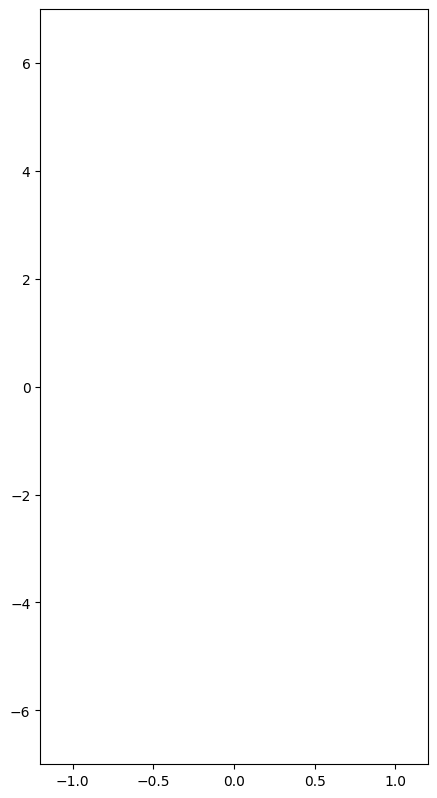

In [3]:
Pmax = .999
Pmin = .001
Omax = np.ceil(np.log(Pmax/(1-Pmax)))
Omin = np.floor(np.log(Pmin/(1-Pmin)))

print(f"""
O(max) = {Omax:+.2f}
O(min) = {Omin:+.2f}
""")

fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)
plt.show();

Let's start to plot the first prior probabilities $\mathbf{Pr}$ axis, at horizontal axis $x=-1$. Ticks will be the Odds (on log scale) and labels will be probabilities.

Let's choose a vector of major ticks we want to show and compute respective Odds, for example:

In [4]:
Pticks = np.sort(np.concatenate([
    np.arange(.1, .999, .1),
    np.arange(.08, 0, -.02),
    np.arange(.01, 0, -.002),
    np.arange(.92, .999, +.02),
    np.arange(.99, .999, +.002),
    [.001, .999]
]))
print(f"""
Probability Labels:
{Pticks}""")


Probability Labels:
[0.001 0.002 0.004 0.006 0.008 0.01  0.02  0.04  0.06  0.08  0.1   0.2
 0.3   0.4   0.5   0.6   0.7   0.8   0.9   0.92  0.94  0.96  0.98  0.99
 0.992 0.994 0.996 0.998 0.999]


In [5]:
Oticks = Pticks / (1 - Pticks)
print(f"""
Odds Coordinates:
{Oticks}""")


Odds Coordinates:
[1.00100100e-03 2.00400802e-03 4.01606426e-03 6.03621730e-03
 8.06451613e-03 1.01010101e-02 2.04081633e-02 4.16666667e-02
 6.38297872e-02 8.69565217e-02 1.11111111e-01 2.50000000e-01
 4.28571429e-01 6.66666667e-01 1.00000000e+00 1.50000000e+00
 2.33333333e+00 4.00000000e+00 9.00000000e+00 1.15000000e+01
 1.56666667e+01 2.40000000e+01 4.90000000e+01 9.90000000e+01
 1.24000000e+02 1.65666667e+02 2.49000000e+02 4.99000000e+02
 9.99000000e+02]


and let's apply it to the first axis, remembering the relationship between Odds and Probabilities and the log scale.

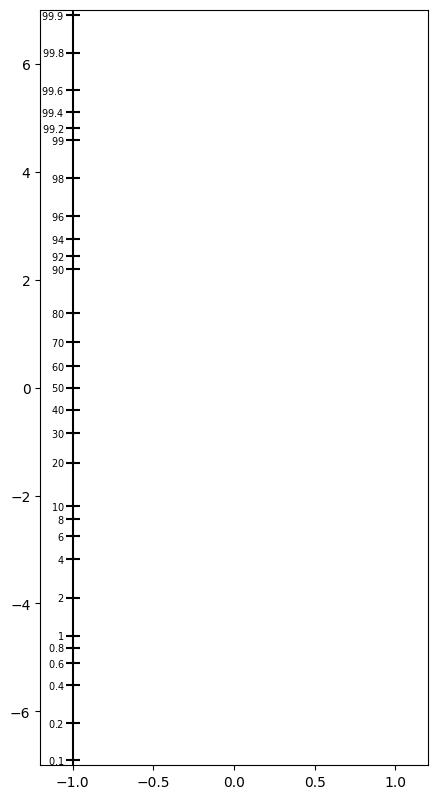

In [6]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )
plt.show();

Let's apply the same method to the posterior probabilities right axis, but reversing values.

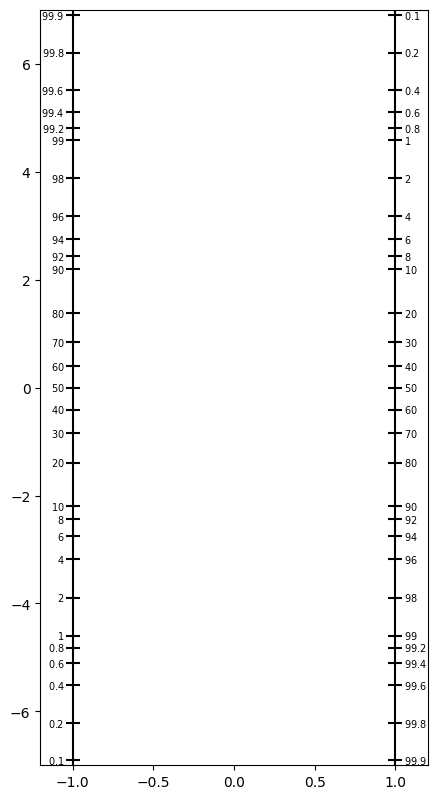

In [7]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )
plt.show();

Now let's work on Likelihood Ratios middle axis, choosing some significant values for major labels. For example, powers of 10 from -3 to 3.

In [8]:
Lticks = [10 ** int(i) for i in np.arange(-3, 3.1, 1)]
print(f"Likelihood Ratios Labels: {Lticks}")

Likelihood Ratios Labels: [0.001, 0.01, 0.1, 1, 10, 100, 1000]


To place values ticks and labels, let's note that prior and posteriors are complementary along the $x$ axis (we reversed nomogram's right axis, indeed)

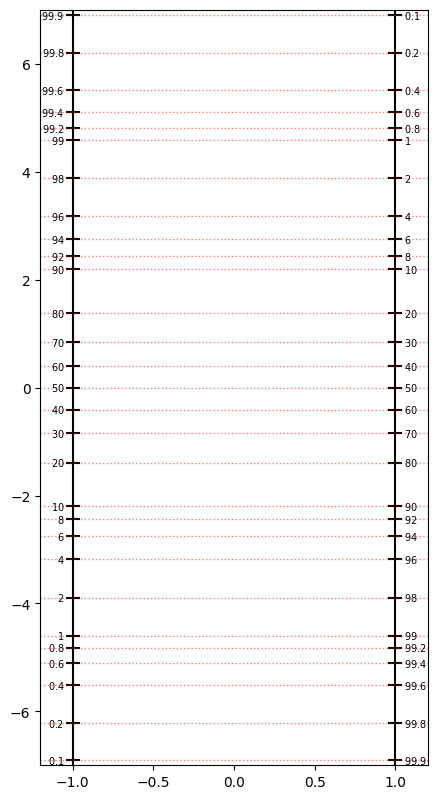

In [9]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

# Complementary values examples
for Otick in Oticks:
    ax.axhline(np.log(Otick), c="r", ls=":", alpha=.5, lw=1)

plt.show();

Thus, we simply need to solve the equation

$$
\frac{1 - \mathbf{Pr}}{\mathbf{Pr}} = \mathbf{LR} \cdot \frac{\mathbf{Pr}}{1 - \mathbf{Pr}}
$$

from which we obtain

$$
\mathbf{Pr} = \frac{1}{1 + \sqrt{\mathbf{LR}}}
$$

and we can compute relative Odds to get container $y$ axis coordinates.

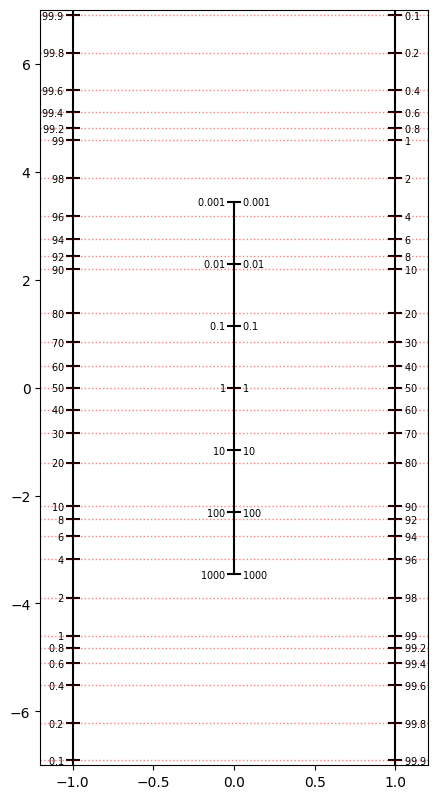

In [10]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

Ops = []
for Ltick in Lticks:
    Op = 1 / (np.sqrt(Ltick) + 1)
    Ops.append(Op)
    ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
    ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
    ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")
    
# Complementary values examples
for Otick in Oticks:
    ax.axhline(np.log(Otick), c="r", ls=":", alpha=.5, lw=1)

plt.show();

We can now add minor ticks to $\mathbf{LR}$ axis and remove complementary values horizontal lines.

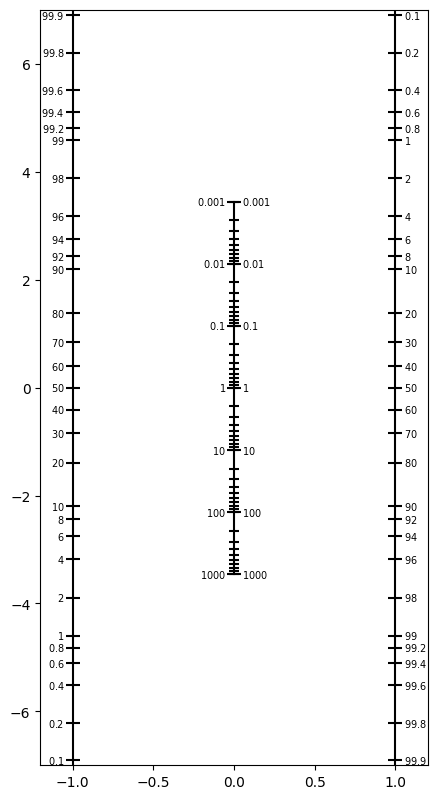

In [11]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

Ops = []
for Ltick in Lticks:
    Op = 1 / (np.sqrt(Ltick) + 1)
    Ops.append(Op)
    ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
    ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
    ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
    minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
    for minor in minors:
        if minor < .001:
            continue
        Op = 1 / (np.sqrt(minor) + 1)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

plt.show();

Nomogram axes are now complete. Let's remove horizontal and vertical container ticks, add title and labels to nomogram axes.

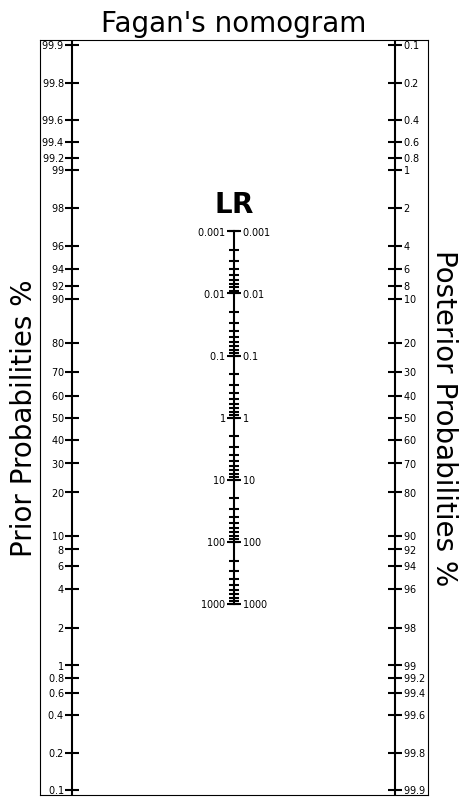

In [12]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

Ops = []
for Ltick in Lticks:
    Op = 1 / (np.sqrt(Ltick) + 1)
    Ops.append(Op)
    ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
    ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
    ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
    minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
    for minor in minors:
        if minor < .001:
            continue
        Op = 1 / (np.sqrt(minor) + 1)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Fagan's nomogram", fontsize=20)
ax.text(-1.3, 0, "Prior Probabilities %", ha="center", va="center", fontsize=20, rotation=90)
ax.text(+1.3, 0, "Posterior Probabilities %", ha="center", va="center", fontsize=20, rotation=270)
ax.text(0, np.log(Ops[0]/(1-Ops[0]))+.5, "$\mathbf{LR}$", ha="center", va="center", fontsize=20)

plt.show();

We can now test it for some Prior Probabilities and Likelihood Ratios values, remembering that prior and posterior probabilities are complementary along $x$ axes, so the function to get Posterior Probability $y$ coordinates will be

$$
\log \left(
    \frac{\mathbf{Pr}}{1-\mathbf{Pr}}
    \right)
=
\log \left(
    \frac{1}{\mathbf{LR}} \cdot \frac{1-\mathbf{Po}}{\mathbf{Po}}
    \right)
$$

In [13]:
def Fagan(draw=[]):
    fig, ax = plt.subplots(figsize=(5,10), dpi=100)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(Omin, Omax)

    ax.axvline(-1, c="k")
    ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
    for Otick, Ptick in zip(Oticks, Pticks):
        ax.text(
            -1.05, np.log(Otick),
            f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
            fontsize=7, va="center", ha="right"
        )

    ax.axvline(+1, c="k")
    ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
    for Otick, Ptick in zip(Oticks, Pticks):
        ax.text(
            +1.05, np.log(Otick),
            f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
            fontsize=7, va="center", ha="left"
        )

    Ops = []
    for Ltick in Lticks:
        Op = 1 / (np.sqrt(Ltick) + 1)
        Ops.append(Op)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
        ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
        ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
        minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
        for minor in minors:
            if minor < .001:
                continue
            Op = 1 / (np.sqrt(minor) + 1)
            ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
    ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Fagan's nomogram", fontsize=20)
    ax.text(-1.3, 0, "Prior Probabilities %", ha="center", va="center", fontsize=20, rotation=90)
    ax.text(+1.3, 0, "Posterior Probabilities %", ha="center", va="center", fontsize=20, rotation=270)
    ax.text(0, np.log(Ops[0]/(1-Ops[0]))+.5, "$\mathbf{LR}$", ha="center", va="center", fontsize=20)
    
    for line in draw:
        Opo = line[1] * (line[0]/(1-line[0]))
        Ppo = Opo/(1+Opo)
        print(f"Pr:{line[0]:>7.2%}  LR:{line[1]:>7.2f}  Po:{Ppo:>7.2%}")
        ax.plot(
            [-1, 1], [np.log(line[0]/(1-line[0])), np.log((1-line[0])/(line[0]*line[1]))]
        )

    plt.show();

Pr:  2.00%  LR: 100.00  Po: 67.11%
Pr: 99.00%  LR:  10.00  Po: 99.90%
Pr: 30.00%  LR:   0.02  Po:  0.85%


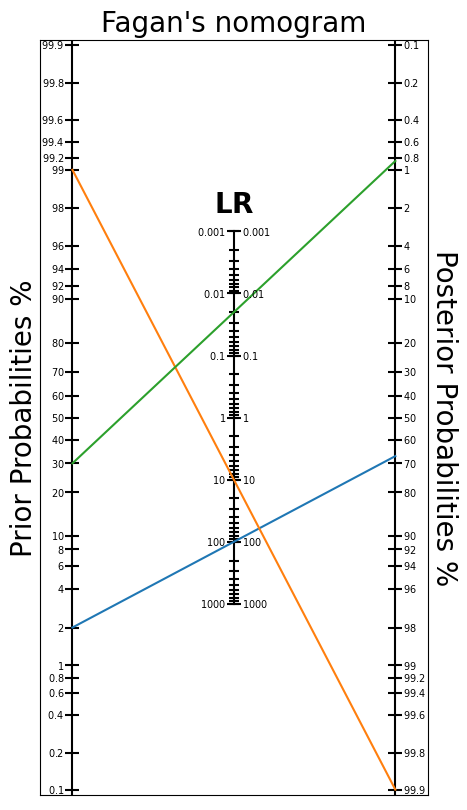

In [14]:
Fagan(
    draw=[
        [.02, 100],
        [.99, 10],
        [.3, .02]
    ]
)